# Import library

In [1]:
import os, pickle, json

import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import  AdaBoostRegressor, BaggingRegressor

# Load test set

In [2]:
df = pd.read_csv('../dataset/cleaned/test_processed_df.csv')

print('load data finished')
print('-'*30)

df = df.reset_index()


y = df['completion-time-in-minutes']
x = df.drop(['completion-time-in-minutes', 'index'], axis=1)

print('prepare data finished')
print('-'*30)
print('total test set:', len(x))

load data finished
------------------------------
prepare data finished
------------------------------
total test set: 2501632


# Evaluation

To evaluate the model, mean squared error (MSE) and mean absolute error (MAE) are measured.

In [3]:
model_dir = '../model/'

def evaluate(model_name):

    print('evaluating model', model_name)

    with open(os.path.join(model_dir, model_name, 'model.pkl'), 'rb') as f:
        model = pickle.load(f)

    ## just for the case that linear regression is evaluated
    try:
        with open(os.path.join(model_dir, model_name, 'best_params.json'), 'r') as f:
            best_params = json.load(f)

        
        print('best params')

        for k,v in best_params.items():
            print('  {}:{}'.format(k,v))

        print('*'*30)

    except:
        pass

    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)

    # print('mean squared error:', round(mse,2))
    # print('mean absolute error:', round(mae,2))
    # print('-'*30)

    result_dict = {
        'model': model_name.replace('Regressor', ''),
        'MSE': mse,
        'MAE': mae
    }

    return result_dict

In [4]:
model_names = ['LinearRegression', 'Lasso', 'ElasticNet', 'AdaBoostRegressor_LinearRegression', 'AdaBoostRegressor_Lasso', 'AdaBoostRegressor_ElasticNet', 'BaggingRegressor_LinearRegression', 'BaggingRegressor_Lasso', 'BaggingRegressor_ElasticNet']

result_list = []

for model_name in model_names:
    res = evaluate(model_name)

    result_list.append(res)

evaluating model LinearRegression
evaluating model Lasso
best params
  alpha:1
  max_iter:100
******************************
evaluating model ElasticNet
best params
  alpha:1
  l1_ratio:0.3
  max_iter:100
******************************
evaluating model AdaBoostRegressor_LinearRegression
best params
  learning_rate:0.5
  loss:linear
  n_estimators:50
******************************
evaluating model AdaBoostRegressor_Lasso
best params
  learning_rate:0.1
  loss:linear
  n_estimators:10
******************************
evaluating model AdaBoostRegressor_ElasticNet
best params
  learning_rate:0.1
  loss:linear
  n_estimators:10
******************************
evaluating model BaggingRegressor_LinearRegression
best params
  n_estimators:10
******************************
evaluating model BaggingRegressor_Lasso
best params
  n_estimators:100
******************************
evaluating model BaggingRegressor_ElasticNet
best params
  n_estimators:50
******************************


In [12]:
def get_base_model_type(s):
    if s.endswith('LinearRegression'):
        return 'LinearRegression'
    elif s.endswith('Lasso'):
        return 'Lasso'
    elif s.endswith('ElasticNet'):
        return 'ElasticNet'

result_df = pd.DataFrame(result_list)
result_df['base_model_type'] = result_df['model'].apply(lambda x: get_base_model_type(x))
result_df = result_df.sort_values(by = 'base_model_type')
result_df = result_df[['base_model_type', 'model', 'MSE', 'MAE']]
result_df
# result_df = pd.melt(result_df, id_vars='model')

,base_model_type,model,MSE,MAE
2,ElasticNet,ElasticNet,1.955431e+00,1.094224
5,ElasticNet,AdaBoost_ElasticNet,1.945535e+00,1.103863
8,ElasticNet,Bagging_ElasticNet,1.955351e+00,1.094201
1,Lasso,Lasso,2.167451e+00,1.158021
4,Lasso,AdaBoost_Lasso,2.178606e+00,1.182134
7,Lasso,Bagging_Lasso,2.167450e+00,1.158015
0,LinearRegression,LinearRegression,2.555720e+15,31963.680427
3,LinearRegression,AdaBoost_LinearRegression,8.153374e+11,571.783865
6,LinearRegression,Bagging_LinearRegression,1.645450e+15,25647.521365


<Axes: xlabel='variable', ylabel='value'>

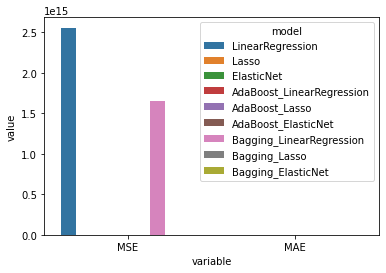

In [8]:
result_df

,model,variable,value
0,LinearRegression,MSE,2.555720e+15
1,Lasso,MSE,2.167451e+00
2,ElasticNet,MSE,1.955431e+00
3,AdaBoost_LinearRegression,MSE,8.153374e+11
4,AdaBoost_Lasso,MSE,2.178606e+00
5,AdaBoost_ElasticNet,MSE,1.945535e+00
6,Bagging_LinearRegression,MSE,1.645450e+15
7,Bagging_Lasso,MSE,2.167450e+00
8,Bagging_ElasticNet,MSE,1.955351e+00
9,LinearRegression,MAE,3.196368e+04
